# Logistic Regression
---

In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

from acquire import get_titanic_data, get_iris_data
from prepare import prep_titanic, prep_iris
from log_reg_util import plot_metrics_by_thresholds, plot_true_by_probs, evaluate_thresholds

## Split your data into training and test.

In [2]:
train, test = prep_titanic(get_titanic_data())
train, validate = train_test_split(train, train_size=.7, random_state=13)
train.shape, validate.shape, test.shape

((436, 15), (187, 15), (268, 15))

In [3]:
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encoded,age_scaled,fare_scaled
439,439,0,2,male,31.0,0,0,10.5000,S,Second,Southampton,1,2,0.384267,0.020495
138,138,0,3,male,16.0,0,0,9.2167,S,Third,Southampton,1,2,0.195778,0.017990
656,656,0,3,male,28.0,0,0,7.8958,S,Third,Southampton,1,2,0.346569,0.015412
201,201,0,3,male,28.0,8,2,69.5500,S,Third,Southampton,0,2,0.346569,0.135753
515,515,0,1,male,47.0,0,0,34.0208,S,First,Southampton,1,2,0.585323,0.066404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,323,1,2,female,22.0,1,1,29.0000,S,Second,Southampton,0,2,0.271174,0.056604
707,707,1,1,male,42.0,0,0,26.2875,S,First,Southampton,1,2,0.522493,0.051310
331,331,0,1,male,45.5,0,0,28.5000,S,First,Southampton,1,2,0.566474,0.055628
223,223,0,3,male,28.0,0,0,7.8958,S,Third,Southampton,1,2,0.346569,0.015412


In [4]:
X_train = train[['fare', 'pclass']]
y_train = train[['survived']]
X_train

,fare,pclass
439,10.5000,2
138,9.2167,3
656,7.8958,3
201,69.5500,3
515,34.0208,1
...,...,...
323,29.0000,2
707,26.2875,1
331,28.5000,1
223,7.8958,3


In [5]:
y_train

,survived
439,0
138,0
656,0
201,0
515,0
...,...
323,1
707,1
331,0
223,0


## Fit a logistic regression model on your training data using sklearn's linear_model.LogisticRegression class. Use fare and pclass as the predictors.

In [6]:
logit = LogisticRegression()

logit.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Use the model's `.predict` method. What is the output?

In [7]:
logit.predict(X_train)

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

## Use the model's .predict_proba method. What is the output? Why do you think it is shaped like this?

In [8]:
logit.predict_proba(X_train)

array([[0.61031003, 0.38968997],
       [0.72050475, 0.27949525],
       [0.72186639, 0.27813361],
       [0.65422464, 0.34577536],
       [0.45915659, 0.54084341],
       [0.3640607 , 0.6359393 ],
       [0.61031003, 0.38968997],
       [0.7210851 , 0.2789149 ],
       [0.4018743 , 0.5981257 ],
       [0.4636421 , 0.5363579 ],
       [0.36641795, 0.63358205],
       [0.70927297, 0.29072703],
       [0.70745931, 0.29254069],
       [0.46901653, 0.53098347],
       [0.59496594, 0.40503406],
       [0.71397214, 0.28602786],
       [0.38918912, 0.61081088],
       [0.72190921, 0.27809079],
       [0.53136855, 0.46863145],
       [0.72201644, 0.27798356],
       [0.71512237, 0.28487763],
       [0.68799339, 0.31200661],
       [0.43636918, 0.56363082],
       [0.71501792, 0.28498208],
       [0.57755366, 0.42244634],
       [0.60725758, 0.39274242],
       [0.65422464, 0.34577536],
       [0.72107654, 0.27892346],
       [0.43636918, 0.56363082],
       [0.60725758, 0.39274242],
       [0.

### It is showing the probability that the classifier is 0 or 1.

## Evaluate your model's predictions on the validate data set. How accurate is the mode? How does changing the threshold affect this?

In [9]:
X_val = validate[['fare', 'pclass']]
y_val = validate[['survived']]

actual = y_val.survived
predictions = logit.predict(X_val)

In [10]:
accuracy_score(actual, predictions)

0.7165775401069518

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


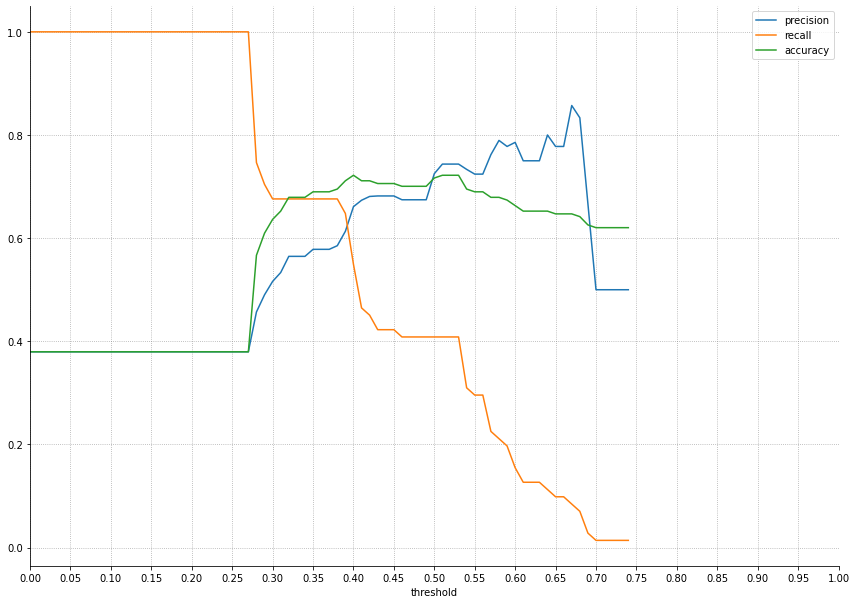

In [11]:
probs = logit.predict_proba(X_val)[:, 1]
plot_metrics_by_thresholds(actual, probs)

In [12]:
evaluate_thresholds(actual, probs).nlargest(1, 'accuracy').threshold.values[0]

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4

In [13]:
evaluate_thresholds(actual, probs).nlargest(1, 'accuracy')

,threshold,precision,recall,accuracy
40,0.4,0.661017,0.549296,0.721925


In [14]:
model_preds = validate[['survived']]
model_preds = model_preds.rename(columns={'survived': 'actual'})
model_preds['fare_pclass_t_optimized'] = (probs > .4).astype(int)
model_preds

,actual,fare_pclass_t_optimized
718,0,0
739,0,0
343,0,0
93,0,0
705,0,1
...,...,...
807,0,0
819,0,0
732,0,0
59,0,0


## Create a model that includes age in addition to fare and pclass. Does this model perform better than your previous one?

In [15]:
X_train = train[['age', 'fare', 'pclass']]
y_train = train.survived

logit.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
predictions = logit.predict(X_train)

accuracy_score(y_train, predictions)

0.6720183486238532

In [17]:
X_val = validate[['age', 'fare', 'pclass']]
y_val = validate.survived

val_predictions = logit.predict(X_val)

accuracy_score(y_val, val_predictions)

0.7433155080213903

In [18]:
probs = logit.predict_proba(X_val)[:, 1]

evaluate_thresholds(y_val, probs).nlargest(2, 'accuracy')

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,threshold,precision,recall,accuracy
49,0.49,0.794872,0.436620,0.743316
50,0.50,0.810811,0.422535,0.743316


### In this cause I would say that it is better to misclassify that someone would die and be wrong then to say they would live and they don't,  so we will go with the threshold that with the best precision to avoid false positives. 

#### $t = .5$

In [19]:
model_preds['age_fare_pclass_t_optimized'] = (probs > 0.5).astype(int)
model_preds

,actual,fare_pclass_t_optimized,age_fare_pclass_t_optimized
718,0,0,0
739,0,0,0
343,0,0,0
93,0,0,0
705,0,1,0
...,...,...,...
807,0,0,0
819,0,0,0
732,0,0,0
59,0,0,0


In [20]:
def score_accuracy(df):
    return df.apply(lambda col: accuracy_score(df.actual, col)).sort_values(ascending=False)

In [21]:
score_accuracy(model_preds)

actual                         1.000000
age_fare_pclass_t_optimized    0.743316
fare_pclass_t_optimized        0.721925
dtype: float64

### So adding age did improve our model

## Include sex in your model as well. Note that you'll need to encode this feature before including it in a model.

In [22]:
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encoded,age_scaled,fare_scaled
439,439,0,2,male,31.0,0,0,10.5000,S,Second,Southampton,1,2,0.384267,0.020495
138,138,0,3,male,16.0,0,0,9.2167,S,Third,Southampton,1,2,0.195778,0.017990
656,656,0,3,male,28.0,0,0,7.8958,S,Third,Southampton,1,2,0.346569,0.015412
201,201,0,3,male,28.0,8,2,69.5500,S,Third,Southampton,0,2,0.346569,0.135753
515,515,0,1,male,47.0,0,0,34.0208,S,First,Southampton,1,2,0.585323,0.066404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,323,1,2,female,22.0,1,1,29.0000,S,Second,Southampton,0,2,0.271174,0.056604
707,707,1,1,male,42.0,0,0,26.2875,S,First,Southampton,1,2,0.522493,0.051310
331,331,0,1,male,45.5,0,0,28.5000,S,First,Southampton,1,2,0.566474,0.055628
223,223,0,3,male,28.0,0,0,7.8958,S,Third,Southampton,1,2,0.346569,0.015412


In [23]:
def encode_sex(train, validate, test):
    encoder = OneHotEncoder()
    encoder.fit(train[['sex']])
    
    cols = ['is' + c for c in encoder.categories_[0]]

    m = encoder.transform(train[['sex']]).todense()
    train = pd.concat([
        train,
        pd.DataFrame(m, columns=cols, index=train.index)
    ], axis=1).drop(columns='ismale')
    
    m = encoder.transform(validate[['sex']]).todense()
    validate = pd.concat([
        validate,
        pd.DataFrame(m, columns=cols, index=validate.index)
    ], axis=1).drop(columns='ismale')
    
    m = encoder.transform(test[['sex']]).todense()
    test = pd.concat([
        test,
        pd.DataFrame(m, columns=cols, index=test.index)
    ], axis=1).drop(columns='ismale')

    return train, validate, test

In [24]:
train, validate, test = encode_sex(train, validate, test)
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encoded,age_scaled,fare_scaled,isfemale
439,439,0,2,male,31.0,0,0,10.5000,S,Second,Southampton,1,2,0.384267,0.020495,0.0
138,138,0,3,male,16.0,0,0,9.2167,S,Third,Southampton,1,2,0.195778,0.017990,0.0
656,656,0,3,male,28.0,0,0,7.8958,S,Third,Southampton,1,2,0.346569,0.015412,0.0
201,201,0,3,male,28.0,8,2,69.5500,S,Third,Southampton,0,2,0.346569,0.135753,0.0
515,515,0,1,male,47.0,0,0,34.0208,S,First,Southampton,1,2,0.585323,0.066404,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,323,1,2,female,22.0,1,1,29.0000,S,Second,Southampton,0,2,0.271174,0.056604,1.0
707,707,1,1,male,42.0,0,0,26.2875,S,First,Southampton,1,2,0.522493,0.051310,0.0
331,331,0,1,male,45.5,0,0,28.5000,S,First,Southampton,1,2,0.566474,0.055628,0.0
223,223,0,3,male,28.0,0,0,7.8958,S,Third,Southampton,1,2,0.346569,0.015412,0.0


In [25]:
X_train = train[['isfemale', 'age', 'fare', 'pclass']]
y_train = train.survived
X_val = validate[['isfemale', 'age', 'fare', 'pclass']]
y_val = validate.survived

In [26]:
logit.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
train_predictions = logit.predict(X_train)

accuracy_score(y_train, train_predictions)

0.7844036697247706

In [28]:
val_predictions = logit.predict(X_val)

accuracy_score(y_val, val_predictions)

0.7914438502673797

In [29]:
val_probs = logit.predict_proba(X_val)[:, 1]

evaluate_thresholds(y_val, val_probs).nlargest(4, 'accuracy')

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,threshold,precision,recall,accuracy
34,0.34,0.730769,0.802817,0.812834
35,0.35,0.730769,0.802817,0.812834
36,0.36,0.730769,0.802817,0.812834
37,0.37,0.736842,0.788732,0.812834


### Since these three are identical, we will use 0.35 since it is the median.

#### $t = .35$

In [30]:
model_preds['isfemale_age_fare_pclass_t_optimized'] = (val_probs > 0.35).astype(int)
model_preds

,actual,fare_pclass_t_optimized,age_fare_pclass_t_optimized,isfemale_age_fare_pclass_t_optimized
718,0,0,0,0
739,0,0,0,0
343,0,0,0,0
93,0,0,0,0
705,0,1,0,0
...,...,...,...,...
807,0,0,0,1
819,0,0,0,0
732,0,0,0,0
59,0,0,0,0


In [31]:
score_accuracy(model_preds)

actual                                  1.000000
isfemale_age_fare_pclass_t_optimized    0.812834
age_fare_pclass_t_optimized             0.743316
fare_pclass_t_optimized                 0.721925
dtype: float64

### So adding sex improved our model

## Try out other combinations of features and models.

In [32]:
X_train = train[['parch', 'isfemale', 'age', 'fare', 'pclass']]
y_train = train.survived
X_val = validate[['parch', 'isfemale', 'age', 'fare', 'pclass']]
y_val = validate.survived

In [33]:
logit.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
train_predictions = logit.predict(X_train)

accuracy_score(y_train, train_predictions)

0.786697247706422

In [35]:
val_predictions = logit.predict(X_val)

accuracy_score(y_val, val_predictions)

0.7967914438502673

In [36]:
val_probs = logit.predict_proba(X_val)[:, 1]

evaluate_thresholds(y_val, val_probs).nlargest(7, 'accuracy')

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,threshold,precision,recall,accuracy
33,0.33,0.725000,0.816901,0.812834
34,0.34,0.730769,0.802817,0.812834
35,0.35,0.730769,0.802817,0.812834
36,0.36,0.730769,0.802817,0.812834
37,0.37,0.736842,0.788732,0.812834
63,0.63,0.821429,0.647887,0.812834
70,0.70,0.909091,0.563380,0.812834


### Again we will optimize precision when their is a tie for accuracy.

#### $t = 0.70$

In [37]:
model_preds['parch_isfemale_age_fare_pclass_t_optimized'] = (val_probs > 0.70).astype(int)
model_preds

,actual,fare_pclass_t_optimized,age_fare_pclass_t_optimized,isfemale_age_fare_pclass_t_optimized,parch_isfemale_age_fare_pclass_t_optimized
718,0,0,0,0,0
739,0,0,0,0,0
343,0,0,0,0,0
93,0,0,0,0,0
705,0,1,0,0,0
...,...,...,...,...,...
807,0,0,0,1,1
819,0,0,0,0,0
732,0,0,0,0,0
59,0,0,0,0,0


In [38]:
score_accuracy(model_preds)

actual                                        1.000000
parch_isfemale_age_fare_pclass_t_optimized    0.812834
isfemale_age_fare_pclass_t_optimized          0.812834
age_fare_pclass_t_optimized                   0.743316
fare_pclass_t_optimized                       0.721925
dtype: float64

## Choose you best model and evaluate it on the test dataset. Is it overfit?

### Since we have a tie for the best model lets see which has the best precision split the tie.

In [39]:
model_preds.apply(lambda col: precision_score(model_preds.actual, col)).sort_values(ascending=False)

actual                                        1.000000
parch_isfemale_age_fare_pclass_t_optimized    0.909091
age_fare_pclass_t_optimized                   0.810811
isfemale_age_fare_pclass_t_optimized          0.730769
fare_pclass_t_optimized                       0.661017
dtype: float64

#### So the last model is the best. Let's see how it does on the test data

In [40]:
X_train = train[['parch', 'isfemale', 'age', 'fare', 'pclass']]
y_train = train.survived
X_test = test[['parch', 'isfemale', 'age', 'fare', 'pclass']]
y_test = test.survived

In [41]:
logit = LogisticRegression()

logit.fit(X_train, y_train)

t = 0.7

test_preds = (logit.predict_proba(X_test)[:, 1] > t).astype(int)
test_preds

accuracy_score(y_test, test_preds)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7947761194029851

### Great our model does not appear to be overfit

In [42]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       171
           1       0.83      0.55      0.66        97

    accuracy                           0.79       268
   macro avg       0.81      0.74      0.76       268
weighted avg       0.80      0.79      0.78       268



---

# Decision Tree

## Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [43]:
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encoded,age_scaled,fare_scaled,isfemale
439,439,0,2,male,31.0,0,0,10.5000,S,Second,Southampton,1,2,0.384267,0.020495,0.0
138,138,0,3,male,16.0,0,0,9.2167,S,Third,Southampton,1,2,0.195778,0.017990,0.0
656,656,0,3,male,28.0,0,0,7.8958,S,Third,Southampton,1,2,0.346569,0.015412,0.0
201,201,0,3,male,28.0,8,2,69.5500,S,Third,Southampton,0,2,0.346569,0.135753,0.0
515,515,0,1,male,47.0,0,0,34.0208,S,First,Southampton,1,2,0.585323,0.066404,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,323,1,2,female,22.0,1,1,29.0000,S,Second,Southampton,0,2,0.271174,0.056604,1.0
707,707,1,1,male,42.0,0,0,26.2875,S,First,Southampton,1,2,0.522493,0.051310,0.0
331,331,0,1,male,45.5,0,0,28.5000,S,First,Southampton,1,2,0.566474,0.055628,0.0
223,223,0,3,male,28.0,0,0,7.8958,S,Third,Southampton,1,2,0.346569,0.015412,0.0


In [44]:
Xtrain = train[['pclass', 'age', 'fare', 'parch', 'isfemale']]
ytrain = train[['survived']]

tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=13)

tree.fit(Xtrain, ytrain)

train_preds = tree.predict(Xtrain)
predictions = train[['survived']]
predictions['gini_train_preds'] = train_preds
predictions

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,survived,gini_train_preds
439,0,0
138,0,0
656,0,0
201,0,0
515,0,0
...,...,...
323,1,1
707,1,0
331,0,0
223,0,0


## Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [45]:
tree.score(Xtrain, ytrain)

0.823394495412844

In [46]:
labels = ['died', 'survived']
predicted_labels = ['predicted died', 'predicted survived']

pd.DataFrame(confusion_matrix(ytrain, train_preds), index=labels, columns=predicted_labels)

,predicted died,predicted survived
died,237,25
survived,52,122


In [47]:
print(classification_report(ytrain, train_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       262
           1       0.83      0.70      0.76       174

    accuracy                           0.82       436
   macro avg       0.83      0.80      0.81       436
weighted avg       0.82      0.82      0.82       436



### Repeat using entropy as your measure of impurity.

In [48]:
Xtrain = train[['pclass', 'age', 'fare', 'parch', 'isfemale']]
ytrain = train[['survived']]

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=13)

tree.fit(Xtrain, ytrain)

train_preds = tree.predict(Xtrain)
predictions = train[['survived']]
predictions['gini_train_preds'] = train_preds
predictions

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,survived,gini_train_preds
439,0,0
138,0,0
656,0,0
201,0,0
515,0,0
...,...,...
323,1,1
707,1,0
331,0,0
223,0,0


In [49]:
tree.score(Xtrain, ytrain)

0.823394495412844

In [50]:
labels = ['died', 'survived']
predicted_labels = ['predicted died', 'predicted survived']

pd.DataFrame(confusion_matrix(ytrain, train_preds), index=labels, columns=predicted_labels)

,predicted died,predicted survived
died,237,25
survived,52,122


In [51]:
print(classification_report(ytrain, train_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       262
           1       0.83      0.70      0.76       174

    accuracy                           0.82       436
   macro avg       0.83      0.80      0.81       436
weighted avg       0.82      0.82      0.82       436



### Which performs better on your in-sample data?

* #### They preform equally well.

---

# Random Forest

## Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 20.

In [52]:
Xtrain = train[['pclass', 'age', 'fare', 'parch', 'isfemale']]
ytrain = train[['survived']]

forest = RandomForestClassifier(criterion='entropy',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=20, 
                            random_state=13)

forest.fit(Xtrain, ytrain)

train_preds = forest.predict(Xtrain)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


## Evaluate your results using the model score, confusion matrix, and classification report.

In [53]:
forest.score(Xtrain, ytrain)

0.9954128440366973

In [54]:
labels = ['died', 'survived']
predicted_labels = ['predicted died', 'predicted survived']

pd.DataFrame(confusion_matrix(ytrain, train_preds), index=labels, columns=predicted_labels)

,predicted died,predicted survived
died,260,2
survived,0,174


In [55]:
print(classification_report(ytrain, train_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       262
           1       0.99      1.00      0.99       174

    accuracy                           1.00       436
   macro avg       0.99      1.00      1.00       436
weighted avg       1.00      1.00      1.00       436



## Run through steps increasing your min_samples_leaf to 5 and decreasing your max_depth to 3.

In [56]:
Xtrain = train[['pclass', 'age', 'fare', 'parch', 'isfemale']]
ytrain = train[['survived']]

forest = RandomForestClassifier(criterion='entropy',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=13)

forest.fit(Xtrain, ytrain)

train_preds = forest.predict(Xtrain)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [57]:
forest.score(Xtrain, ytrain)

0.8096330275229358

In [58]:
labels = ['died', 'survived']
predicted_labels = ['predicted died', 'predicted survived']

pd.DataFrame(confusion_matrix(ytrain, train_preds), index=labels, columns=predicted_labels)

,predicted died,predicted survived
died,231,31
survived,52,122


In [59]:
print(classification_report(ytrain, train_preds))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       262
           1       0.80      0.70      0.75       174

    accuracy                           0.81       436
   macro avg       0.81      0.79      0.80       436
weighted avg       0.81      0.81      0.81       436



## What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

* ### The second model worked slightly better, fixing two false negatives from the first model